In [53]:
# Making the necessary imports
import backtrader as bt
import datetime
import matplotlib
import math
import talib
import numpy as np

In [54]:
# Create a Stratey
class RsiSignalStrategy(bt.Strategy):
    # The parameters which are passed to the RSI indicator called from backtrader
    params = dict(
		rsi_periods=14, rsi_upper=80, rsi_lower=35, rsi_mid=50
	)

    def __init__(self):

        # add RSI indicator
        self.rsi = bt.indicators.RSI(period=self.p.rsi_periods, upperband=self.p.rsi_upper, lowerband=self.p.rsi_lower)
        talib.RSI(np.array(self.data))

    def next(self):
        if(self.rsi<self.params.rsi_lower):
            self.buy(size=100)
        
        if(self.rsi>self.params.rsi_upper):
            self.sell(size=100)

        if(self.rsi>self.params.rsi_mid):
            if(self.position.size>0):
                self.close()
            
        if(self.rsi<self.params.rsi_mid):
            if(self.position.size<0):
                self.close()

In [55]:
# Calling the cerebro engine to backtest the strategy
cerebro = bt.Cerebro()
starting_cash = 100000.0
cerebro.broker.setcash(starting_cash)
print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())

data = bt.feeds.YahooFinanceCSVData(
    #Getting the data for apple to test the strategy
        dataname='AAPL_new.csv',
        fromdate=datetime.datetime(2001, 1, 1),
        todate=datetime.datetime(2013, 12, 31),
        reverse=False)

cerebro.adddata(data)
cerebro.addstrategy(RsiSignalStrategy)


Starting Portfolio Value: 100000.00


0

In [56]:
cerebro.run()
print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())

Final Portfolio Value: 105825.00


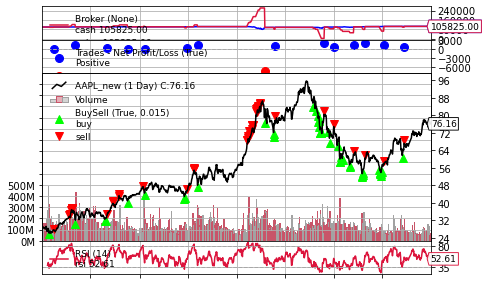

[[<Figure size 432x288 with 5 Axes>]]

In [57]:
%matplotlib inline
cerebro.plot(iplot=False)